# BETA CORRELATION WITH SIMULATIONS AND SHARPE RATIO 

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
# import nalyst
warnings.filterwarnings("ignore")

## FINANCIAL TECHNOLOGY

In [ ]:
class MonteCarloSimulator:
    def __init__(self, symbol, start_date, end_date):
        self.symbol = symbol
        self.data = yf.download(symbol, start=start_date, end=end_date)['Adj Close']
        self.returns = np.log(1 + self.data.pct_change())
        self.mu = self.returns.mean()
        self.sigma = self.returns.std()
        
    def generate_paths(self, num_paths, num_days):
        T = num_days
        N = num_paths
        S0 = self.data.iloc[-1]
        dt = 1 / T
        
        paths = np.zeros((T, N))
        paths[0] = S0
        for t in range(1, T):
            drift = (self.mu - 0.5 * self.sigma ** 2) * dt
            diffusion = self.sigma * np.sqrt(dt) * np.random.normal(size=N)
            paths[t] = paths[t-1] * np.exp(drift + diffusion)
            
        return paths
    
    def plot_paths(self, num_paths, num_days):
        paths = self.generate_paths(num_paths, num_days)
        plt.style.use('dark_background')
        plt.figure(figsize=(15,6))
        plt.plot(paths)
        plt.xlabel('Trading Days')
        plt.ylabel('Stock Price')
        plt.title('Monte Carlo Simulation for ' + self.symbol)
        plt.grid(linestyle='--', color='gray', alpha=0.5)
        plt.show()

In [ ]:
class MonteCarloSimulation:
    def __init__(self, stock_ticker):
        self.stock = yf.Ticker(stock_ticker).history(period="max")
        self.returns = self.stock['Close'].pct_change().dropna()
        
    def simulate_without_replacement(self, num_simulations):
        simulations = []
        for i in range(num_simulations):
            sim = np.random.choice(self.returns, size=len(self.returns), replace=False)
            simulations.append(sim)
        return simulations
    
    def simulate_with_replacement(self, num_simulations):
        simulations = []
        for i in range(num_simulations):
            sim = np.random.choice(self.returns, size=len(self.returns), replace=True)
            simulations.append(sim)
        return simulations
    
    def simulate_with_alterations(self, num_simulations):
        simulations = []
        for i in range(num_simulations):
            sim = np.array(self.returns)
            indices = np.random.choice(len(self.returns), int(len(self.returns) * 0.5), replace=False)
            for index in indices:
                sim[index] = sim[index] + 0.02
            simulations.append(sim)
        return simulations
    
    def calculate_cumulative_returns(self, simulations):
        cumulative_returns = []
        for sim in simulations:
            cumulative_return = (1 + sim).cumprod() - 1
            cumulative_returns.append(cumulative_return)
        return cumulative_returns
    
    def plot_cumulative_returns(self, cumulative_returns, title, color='black', linewidth=3):
        plt.figure(figsize=(16, 9))
        plt.grid(linestyle='--', color='gray', alpha=0.5)
        for cumulative_return in cumulative_returns:
            plt.plot(cumulative_return, alpha=0.5)
        plt.title(title)
        plt.xlabel('Time')
        plt.show()

In [ ]:
class SharpRatio:
    def __init__(self, ticker):
        self.ticker = yf.Ticker(ticker)
        self.returns = self.ticker.history(period="max")['Close'].pct_change().dropna()
    
    def calculate_sharp_ratio(self, cumulative_returns):
        average_returns = np.mean(cumulative_returns, axis=1)
        risk_free_rate = 0.02
        sharp_ratios = (average_returns - risk_free_rate) / np.std(average_returns)
        return sharp_ratios
    
    def plot_sharp_ratio(self, sharp_ratios, title):
        plt.figure(figsize=(16, 9))
        plt.grid(linestyle='--', color='gray', alpha=0.5)
        plt.hist(sharp_ratios, bins=50, color='red', alpha=0.7)
        plt.title(title)
        plt.xlabel('Sharp Ratio')
        plt.show()

## 1. MONTE CARLO SIMULATION INDIAN BANKS

## HDFCBANK

[*********************100%***********************]  1 of 1 completed


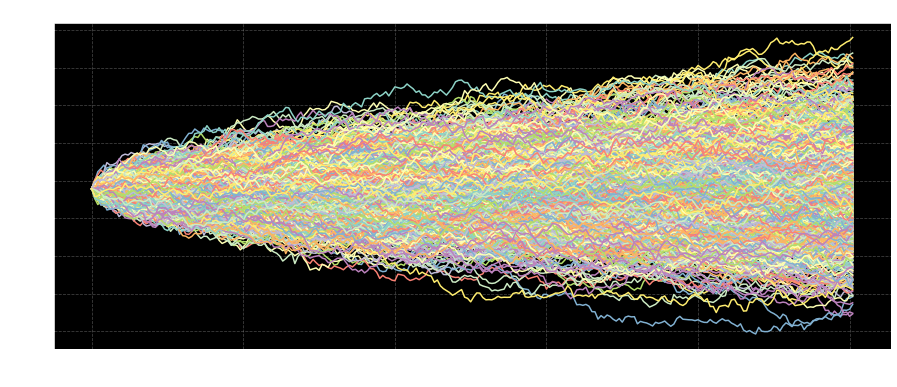

In [ ]:
simulator = MonteCarloSimulator('HDFCBANK.NS', '2020-01-01', '2021-12-31')
simulator.plot_paths(num_paths=1000, num_days=252)

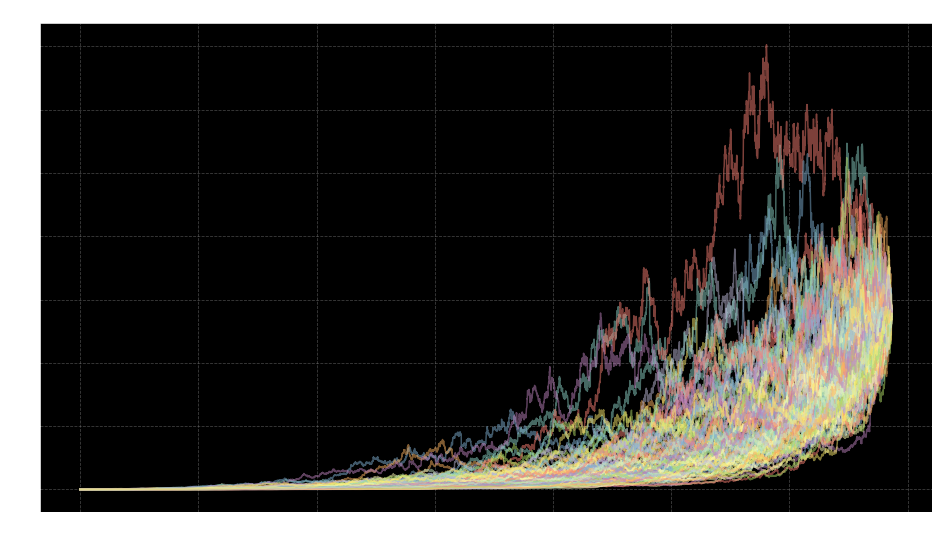

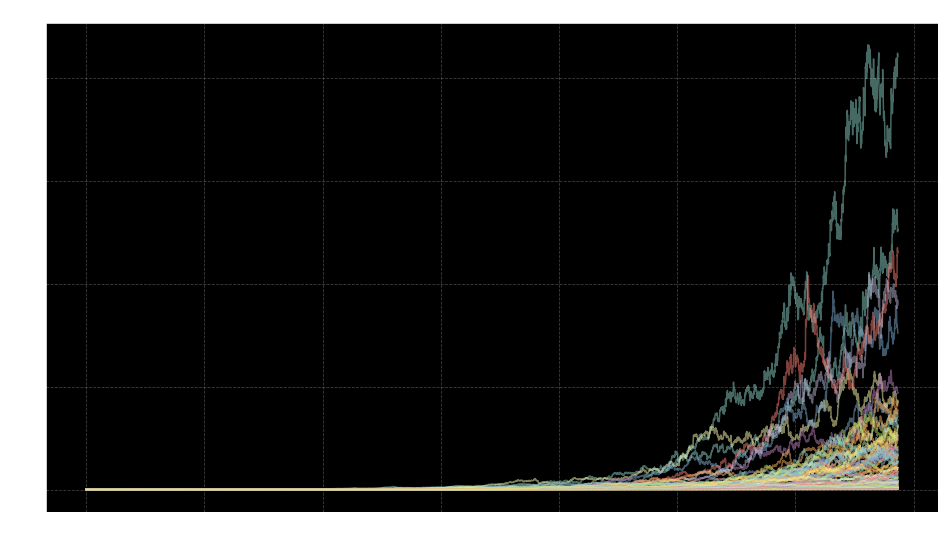

In [ ]:
monte_carlo = MonteCarloSimulation("HDFCBANK.NS")
# Simulate the returns without replacement
simulations_without_replacement = monte_carlo.simulate_without_replacement(100)
cumulative_returns_without_replacement = monte_carlo.calculate_cumulative_returns(simulations_without_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_without_replacement, 'Cumulative Return of Simulations Without Replacement')

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_with_replacement, 'Cumulative Return of Simulations With Replacement')

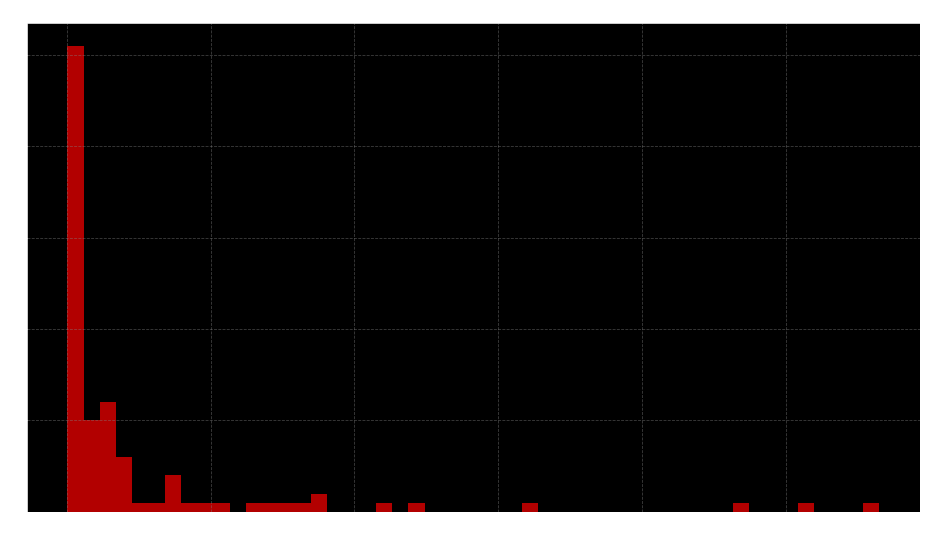

In [ ]:
sharp_ratio = SharpRatio("HDFCBANK.NS")

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)

# Calculate the sharp ratio
sharp_ratios = sharp_ratio.calculate_sharp_ratio(cumulative_returns_with_replacement)
sharp_ratio.plot_sharp_ratio(sharp_ratios, 'Sharp Ratio of Simulations With Replacement')

## ICICI BANK

[*********************100%***********************]  1 of 1 completed


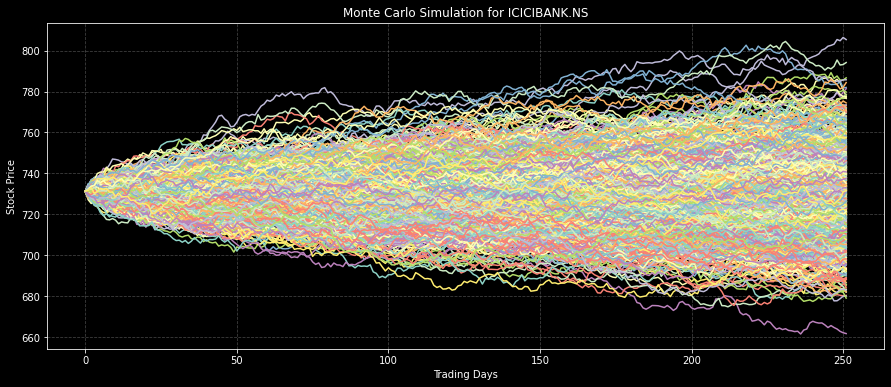

In [ ]:
simulator = MonteCarloSimulator('ICICIBANK.NS', '2020-01-01', '2021-12-31')
simulator.plot_paths(num_paths=1000, num_days=252)

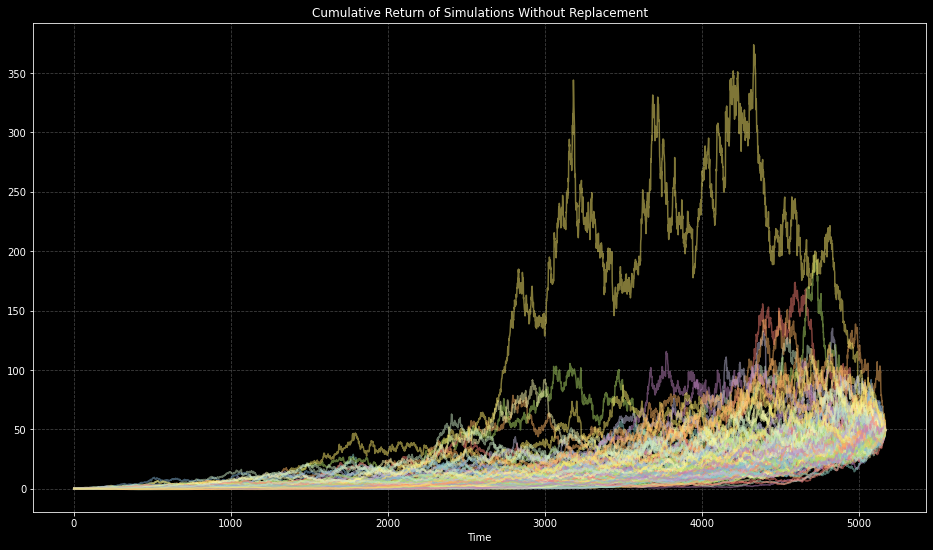

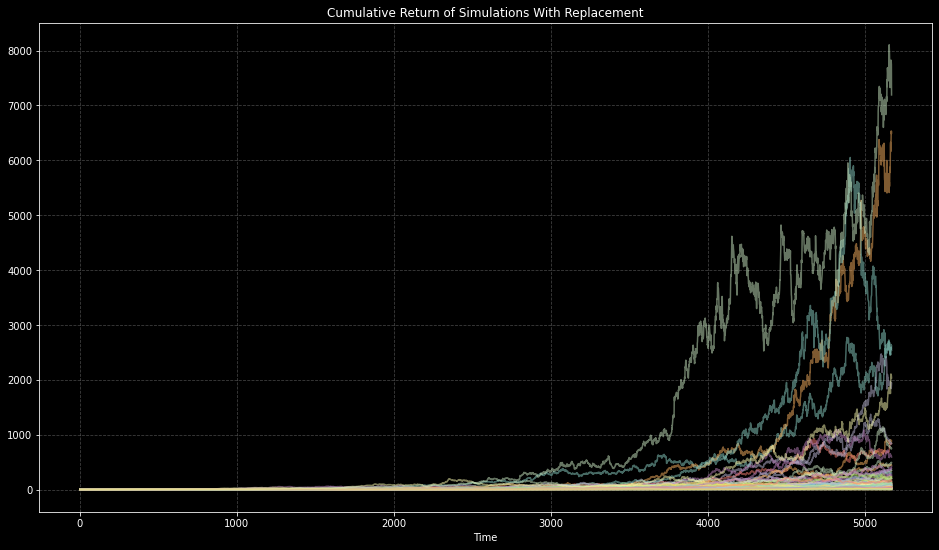

In [ ]:
monte_carlo = MonteCarloSimulation("ICICIBANK.NS")
# Simulate the returns without replacement
simulations_without_replacement = monte_carlo.simulate_without_replacement(100)
cumulative_returns_without_replacement = monte_carlo.calculate_cumulative_returns(simulations_without_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_without_replacement, 'Cumulative Return of Simulations Without Replacement')

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_with_replacement, 'Cumulative Return of Simulations With Replacement')

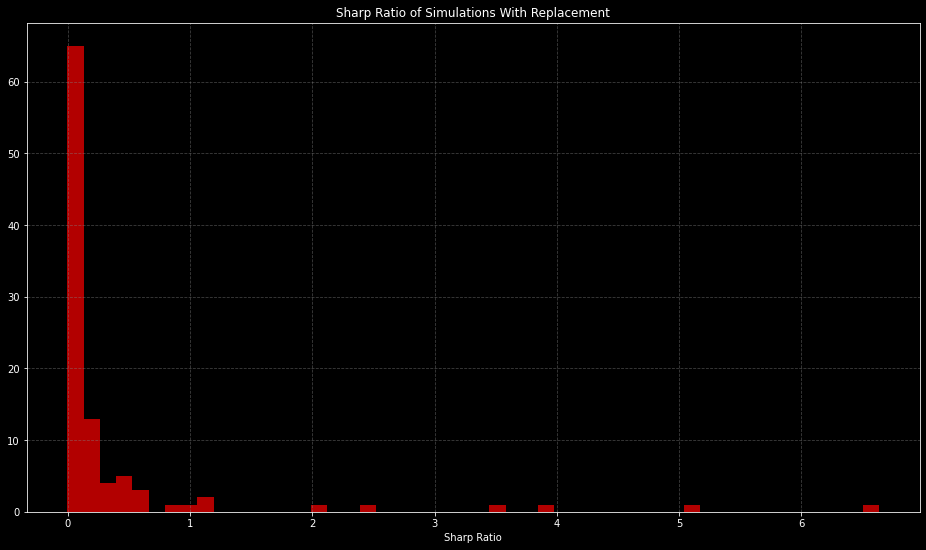

In [ ]:
sharp_ratio = SharpRatio("ICICIBANK.NS")

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)

# Calculate the sharp ratio
sharp_ratios = sharp_ratio.calculate_sharp_ratio(cumulative_returns_with_replacement)
sharp_ratio.plot_sharp_ratio(sharp_ratios, 'Sharp Ratio of Simulations With Replacement')

## SBIN

[*********************100%***********************]  1 of 1 completed


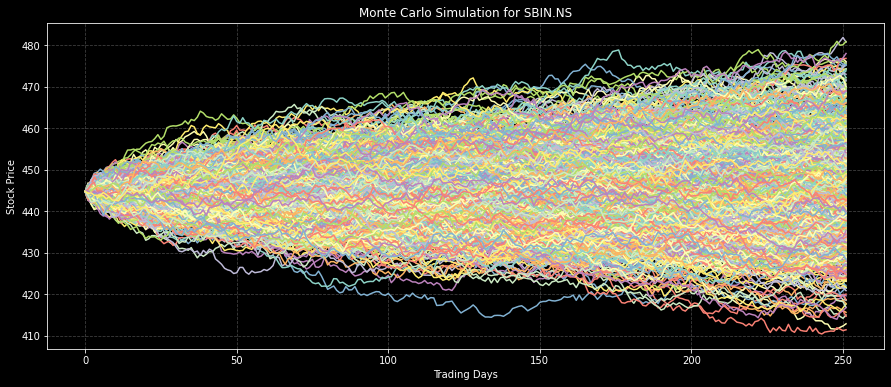

In [ ]:
simulator = MonteCarloSimulator('SBIN.NS', '2020-01-01', '2021-12-31')
simulator.plot_paths(num_paths=1000, num_days=252)

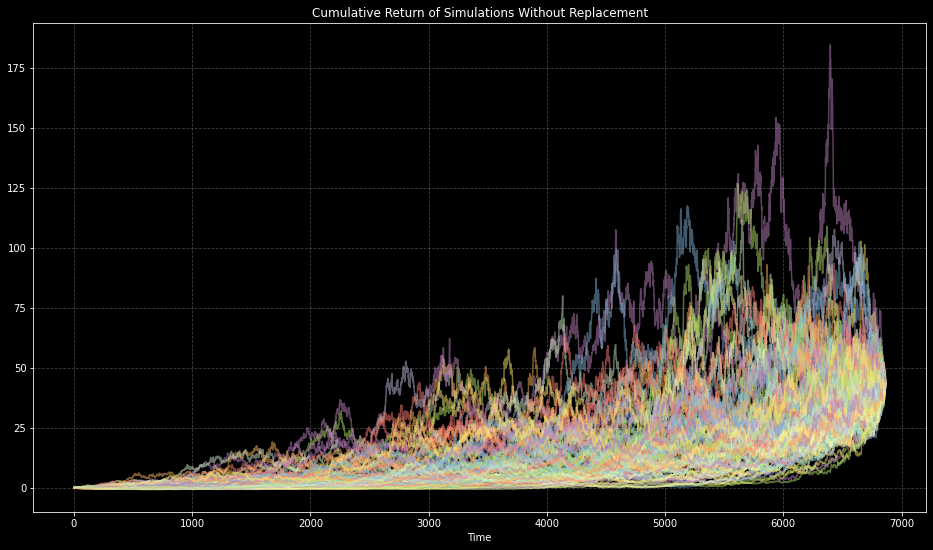

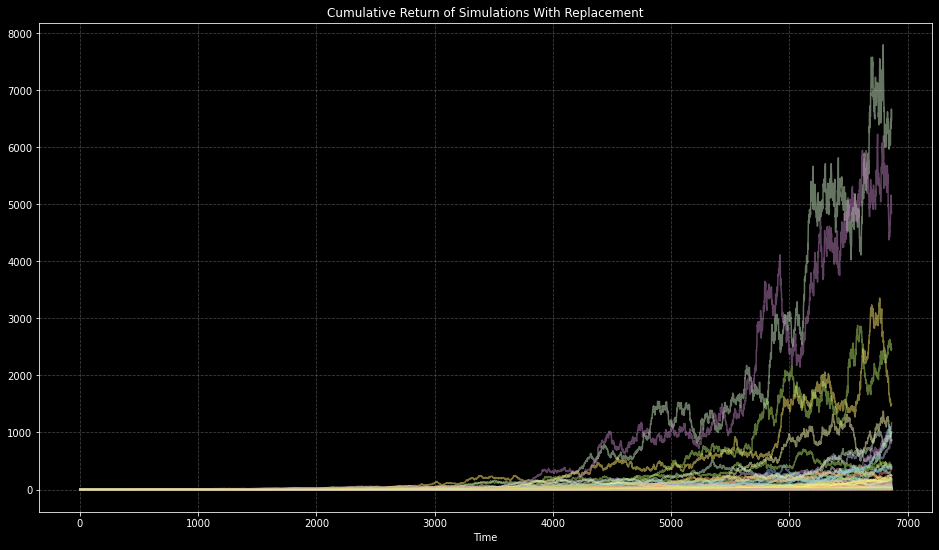

In [ ]:
monte_carlo = MonteCarloSimulation("SBIN.NS")
# Simulate the returns without replacement
simulations_without_replacement = monte_carlo.simulate_without_replacement(100)
cumulative_returns_without_replacement = monte_carlo.calculate_cumulative_returns(simulations_without_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_without_replacement, 'Cumulative Return of Simulations Without Replacement')

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_with_replacement, 'Cumulative Return of Simulations With Replacement')

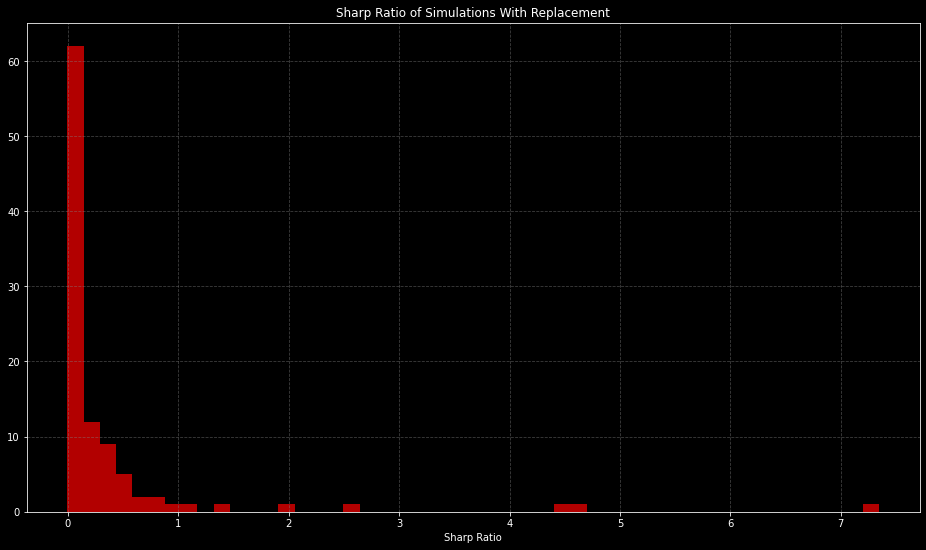

In [ ]:
sharp_ratio = SharpRatio("SBIN.NS")

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)

# Calculate the sharp ratio
sharp_ratios = sharp_ratio.calculate_sharp_ratio(cumulative_returns_with_replacement)

sharp_ratio.plot_sharp_ratio(sharp_ratios, 'Sharp Ratio of Simulations With Replacement')

## KOTAKBANK

[*********************100%***********************]  1 of 1 completed


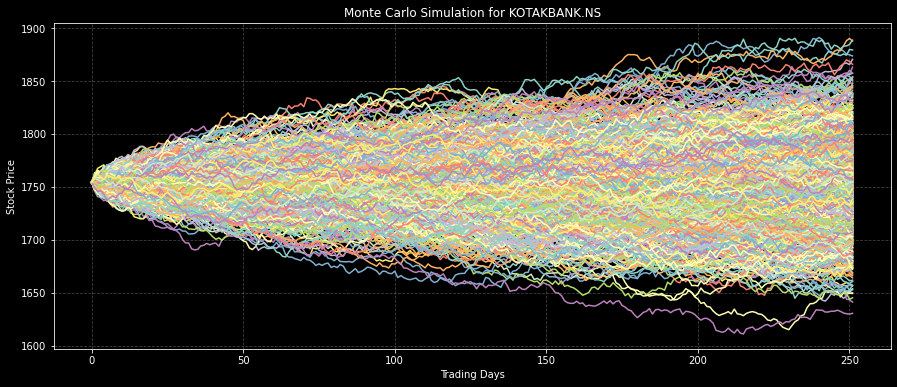

In [ ]:
simulator = MonteCarloSimulator('KOTAKBANK.NS', '2020-01-01', '2021-12-31')
simulator.plot_paths(num_paths=1000, num_days=252)

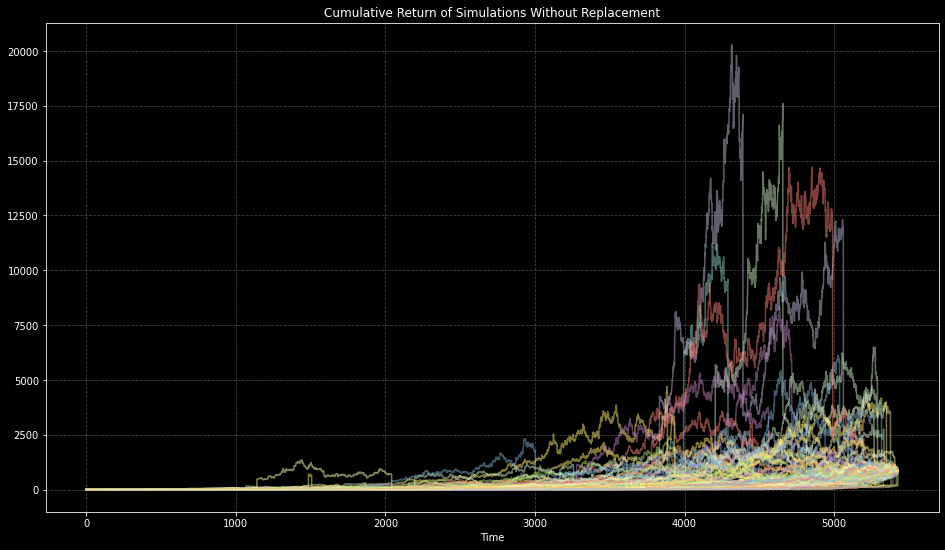

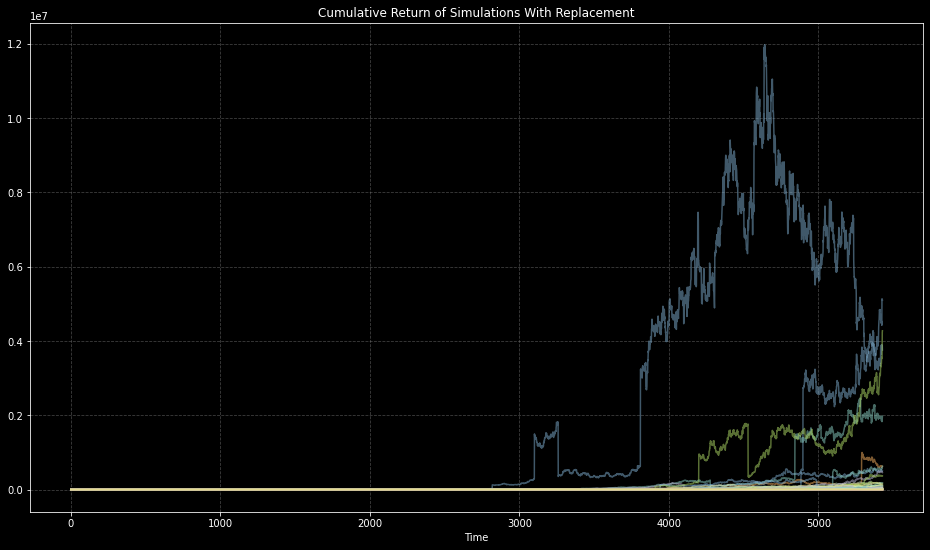

In [ ]:
monte_carlo = MonteCarloSimulation("KOTAKBANK.NS")
# Simulate the returns without replacement
simulations_without_replacement = monte_carlo.simulate_without_replacement(100)
cumulative_returns_without_replacement = monte_carlo.calculate_cumulative_returns(simulations_without_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_without_replacement, 'Cumulative Return of Simulations Without Replacement')

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_with_replacement, 'Cumulative Return of Simulations With Replacement')

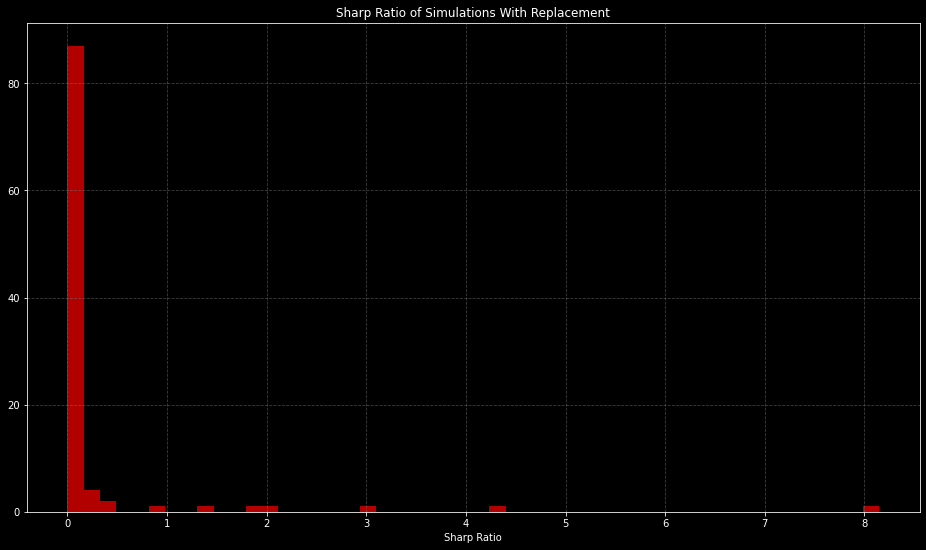

In [ ]:
sharp_ratio = SharpRatio("KOTAKBANK.NS")

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)

# Calculate the sharp ratio
sharp_ratios = sharp_ratio.calculate_sharp_ratio(cumulative_returns_with_replacement)

sharp_ratio.plot_sharp_ratio(sharp_ratios, 'Sharp Ratio of Simulations With Replacement')

## 2. THE BENCHMARK RETURN OF AN ASSET

In [ ]:
index = '^NSEI'
data = yf.download(index, start='2000-01-01', end='2023-04-20')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# the benchmark return as the daily return of the index
benchmark_return = data['Close'].pct_change().dropna()
benchmark_return[:10]

Date
2007-09-18 00:00:00+05:30    0.011469
2007-09-19 00:00:00+05:30    0.040946
2007-09-20 00:00:00+05:30    0.003212
2007-09-21 00:00:00+05:30    0.018957
2007-09-24 00:00:00+05:30    0.019566
2007-09-25 00:00:00+05:30    0.001348
2007-09-26 00:00:00+05:30    0.000334
2007-09-27 00:00:00+05:30    0.012155
2007-09-28 00:00:00+05:30    0.004160
2007-10-01 00:00:00+05:30    0.009480
Name: Close, dtype: float64

In [ ]:
print(f'Mean Benchmark Return: {np.mean(benchmark_return)}')
print(f'Standard Deviation of Benchmark Return: {np.std(benchmark_return)}')

Mean Benchmark Return: 0.0004528337277080708
Standard Deviation of Benchmark Return: 0.013778617695899307


## 3. CALCULATING BETA OF INDIAN COMPANIES 

Beta is an important metric used in finance to measure the volatility of an investment relative to a benchmark. A beta of 1 means that an investment's price will move with the market, while a beta less than 1 means it is less volatile than the market, and a beta greater than 1 means it is more volatile.

Beta is important for investors because it helps to identify the level of risk associated with an investment. Higher beta investments are considered riskier because they are more volatile, while lower beta investments are considered to be less risky. By knowing the beta of an investment, an investor can make informed decisions about their portfolio and adjust their investments to meet their risk tolerance and investment goals.

Additionally, beta can be used to help determine the expected returns from an investment. For example, if a stock has a beta of 1.5, it is expected to return 1.5 times the return of the benchmark. This information can be useful for investors when deciding whether to buy, sell, or hold a particular stock.

## BETA FROM MAXIMUM TIME PERIOD

In [ ]:
def calculate_beta_max(ticker, benchmark_ticker):
    stock = yf.Ticker(ticker).history(period="max")
    benchmark = yf.Ticker(benchmark_ticker).history(period="max")
    
    stock_returns = stock['Close'].pct_change().dropna()
    benchmark_returns = benchmark['Close'].pct_change().dropna()
    
    min_len = min(len(stock_returns), len(benchmark_returns))
    stock_returns = stock_returns[-min_len:]
    benchmark_returns = benchmark_returns[-min_len:]
    
    covariance = np.cov(stock_returns, benchmark_returns)[0][1]
    benchmark_variance = np.var(benchmark_returns)
    beta = covariance / benchmark_variance
    
    return beta

In [ ]:
beta = calculate_beta_max("RELIANCE.NS", "^NSEI")

In [ ]:
print("The beta of RELIANCE is:", beta)

The beta of RELIANCE is: 0.06475808683686561


In [ ]:
beta = calculate_beta_max("TCS.NS", "^NSEI")

In [ ]:
print("The beta of TCS is:", beta)

The beta of TCS is: 0.05619546594062109


## BETA (5Y MONTHLY)

In [ ]:
def calculate_beta(ticker, benchmark):
    stock = yf.Ticker(ticker).history(period="5y", interval='1mo')
    benchmark = yf.Ticker(benchmark).history(period="5y", interval='1mo')
    
    stock_returns = stock['Close'].pct_change().dropna()
    benchmark_returns = benchmark['Close'].pct_change().dropna()
    
    covariance = np.cov(stock_returns, benchmark_returns)[0][1]
    benchmark_variance = np.var(benchmark_returns)
    
    beta = covariance / benchmark_variance
    return beta

In [ ]:
beta = calculate_beta("WIPRO.NS", "^NSEI")

In [ ]:
print("The beta of WIPRO is:", beta)

The beta of WIPRO is: 0.4566377897096989


In [ ]:
beta = calculate_beta("NESTLEIND.NS", "^NSEI")

In [ ]:
print("The beta of NESTLEIND is:", beta)

The beta of NESTLEIND is: 0.3603193261111654


In [37]:
df = pd.read_csv('https://pkgstore.datahub.io/core/s-and-p-500-companies/constituents_csv/data/1beb8c524488247ccb27917bfcb581ec/constituents_csv.csv')
df.tail()

,Symbol,Name,Sector
500,YUM,Yum! Brands,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet,Health Care
503,ZION,Zions Bancorp,Financials
504,ZTS,Zoetis,Health Care


## BETA CORRELATION

In [38]:
df.columns = df.columns.str.lower()
companies = df.symbol.unique()
companies[:20]

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE',
       'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',
       'ARE', 'ALGN'], dtype=object)

In [39]:
us_500 = []
ticker = df.symbol.unique()
for i in ticker:
    us_500.append(i)

In [40]:
us_price_data = yf.download(us_500, start="2023-03-13", end="2023-03-20")['Adj Close']
us_price_data.dropna(axis=1, inplace=True)

[*********************100%***********************]  505 of 505 completed

21 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- FBHS: No timezone found, symbol may be delisted
- DRE: No timezone found, symbol may be delisted
- XLNX: No timezone found, symbol may be delisted
- CERN: No timezone found, symbol may be delisted
- NLOK: No timezone found, symbol may be delisted
- KSU: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- BLL: No timezone found, symbol may be delisted
- WLTW: No timezone found, symbol may be delisted
- TWTR: No timezone found, symbol may be delisted
- DISCA: No timezone found, symbol may be delisted
- ANTM: No timezone found, symbol may be delisted
- ABMD: No data found for this date range, symbol may be delisted
- NLSN: No timezone found, symbol may be delisted
- PBCT: No timezone found, symbol may be delisted
- CTXS: No timezone found, symbol may be delisted
- DISCK: No timezone fou

In [41]:
us_price_data.shape

(5, 484)

In [42]:
def calculate_beta_five(ticker, benchmark):
    try:
        stock = yf.Ticker(ticker).history(period="5y", interval='1mo')
        benchmark = yf.Ticker(benchmark).history(period="5y", interval='1mo')

        # Align the dates of stock and benchmark DataFrames
        stock, benchmark = stock.align(benchmark, join='inner', axis=0)

        stock_returns = stock['Close'].pct_change().dropna()
        benchmark_returns = benchmark['Close'].pct_change().dropna()

        covariance = np.cov(stock_returns, benchmark_returns)[0][1]
        benchmark_variance = np.var(benchmark_returns)

        beta = covariance / benchmark_variance
        return beta
    except Exception as e:
        print(f"Error: Invalid ticker symbol - {e}")
        return None


In [43]:
tickers = us_price_data
benchmark = "^GSPC"

i = 1
for ticker in tickers:
    beta = calculate_beta_five(ticker, benchmark)
    print(i, "The beta of " + ticker + " is: " + str(beta))
    i += 1

1 The beta of A is: 1.0667955280893453
2 The beta of AAL is: 1.5674399352025945
3 The beta of AAP is: 1.1389153424067442
4 The beta of AAPL is: 1.310945900447075
5 The beta of ABBV is: 0.5633547599650729
6 The beta of ABC is: 0.5292546596629291
7 The beta of ABT is: 0.6617067336423751
8 The beta of ACN is: 1.2674471154155253
9 The beta of ADBE is: 1.326014478224858
10 The beta of ADI is: 1.165598087123304
11 The beta of ADM is: 0.8146199594057669
12 The beta of ADP is: 0.8403891551521616
13 The beta of ADSK is: 1.5668154880607972
14 The beta of AEE is: 0.4604942279492007
15 The beta of AEP is: 0.44666537858255595
16 The beta of AES is: 0.9521543514170664
17 The beta of AFL is: 0.9336824697103292
18 The beta of AIG is: 1.1709271065031703
19 The beta of AIZ is: 0.5443028188193715
20 The beta of AJG is: 0.7171682949844617
21 The beta of AKAM is: 0.8171227079696507
22 The beta of ALB is: 1.6005130407598593
23 The beta of ALGN is: 1.5986549876179683
24 The beta of ALK is: 1.5454265307995203

In [44]:
beta_values = []
for ticker in tickers:
    beta = calculate_beta_five(ticker, benchmark)
    beta_values.append(beta)

In [45]:
tick = tickers.columns
tick

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=484)

In [46]:
df_beta = pd.DataFrame(beta_values)
df_beta['ticker'] = tick

In [47]:
df_beta[:10]

,0,ticker
0,1.066822,A
1,1.567411,AAL
2,1.138814,AAP
3,1.310911,AAPL
4,0.563387,ABBV
5,0.529191,ABC
6,0.661716,ABT
7,1.267432,ACN
8,1.326059,ADBE
9,1.165632,ADI


In [48]:
df_beta.rename(columns={df_beta.columns[0]: 'beta'}, inplace=True)

In [49]:
df_beta.sort_values(by='beta', ascending=True, inplace=True)

In [50]:
df_temp1 = df_beta.head(20)
df_temp1

,beta,ticker
214,0.166496,HRL
58,0.182102,BIIB
113,0.191147,CTRA
394,0.212247,SJM
376,0.238746,REGN
187,0.257154,GIS
92,0.275157,CLX
217,0.307708,HSY
124,0.336202,DG
105,0.350105,CPB


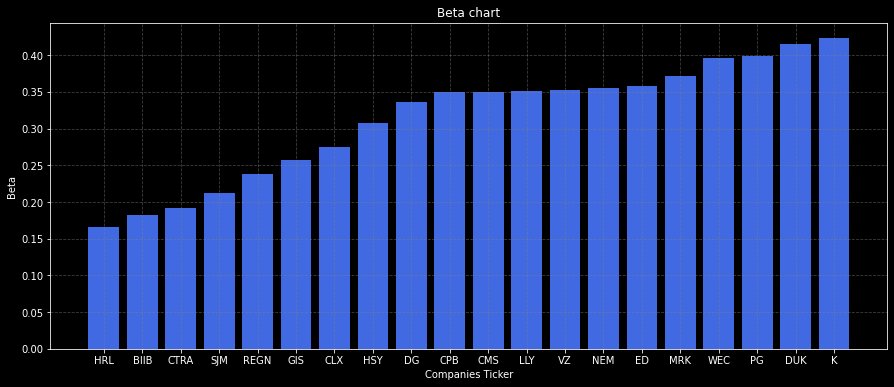

In [58]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 6))
plt.bar(df_temp1.ticker, df_temp1.beta, color="royalblue")
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xlabel('Companies Ticker')
plt.ylabel('Beta')
plt.title("Beta chart")
plt.show()

In [52]:
df_temp2 = df_beta
df_temp2.tail(20)

,beta,ticker
196,1.923101,GPS
28,1.974734,AMD
140,2.027244,DXC
169,2.028974,FCX
159,2.032510,ETSY
167,2.044909,FANG
41,2.056382,APTV
474,2.069202,WYNN
429,2.078096,TSLA
288,2.114551,MGM


In [53]:
df_temp2.sort_values(by='beta', ascending=False, inplace=True)

In [54]:
df_temp2 = df_temp2.head(20)
df_temp2

,beta,ticker
38,3.591422,APA
118,2.943344,CZR
311,2.537611,NCLH
373,2.508994,RCL
302,2.430216,MRO
139,2.419868,DVN
79,2.271298,CCL
345,2.249655,PENN
200,2.181629,HAL
367,2.152102,PVH


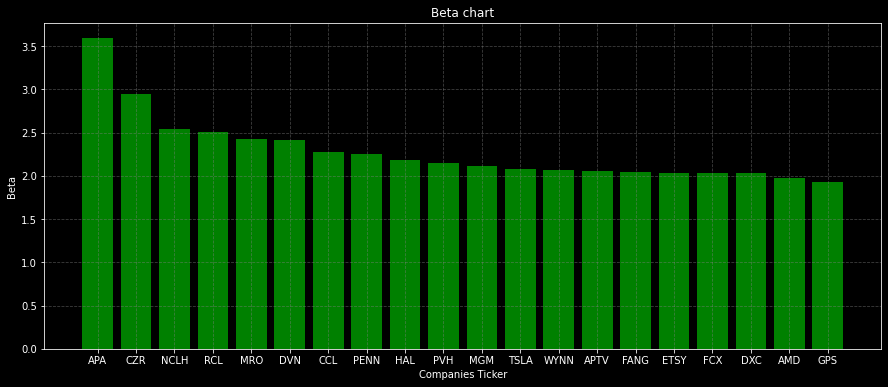

In [57]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 6))
plt.bar(df_temp2.ticker, df_temp2.beta, color="green")
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xlabel('Companies Ticker')
plt.ylabel('Beta')
plt.title("Beta chart")
plt.show()